# SHAP

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


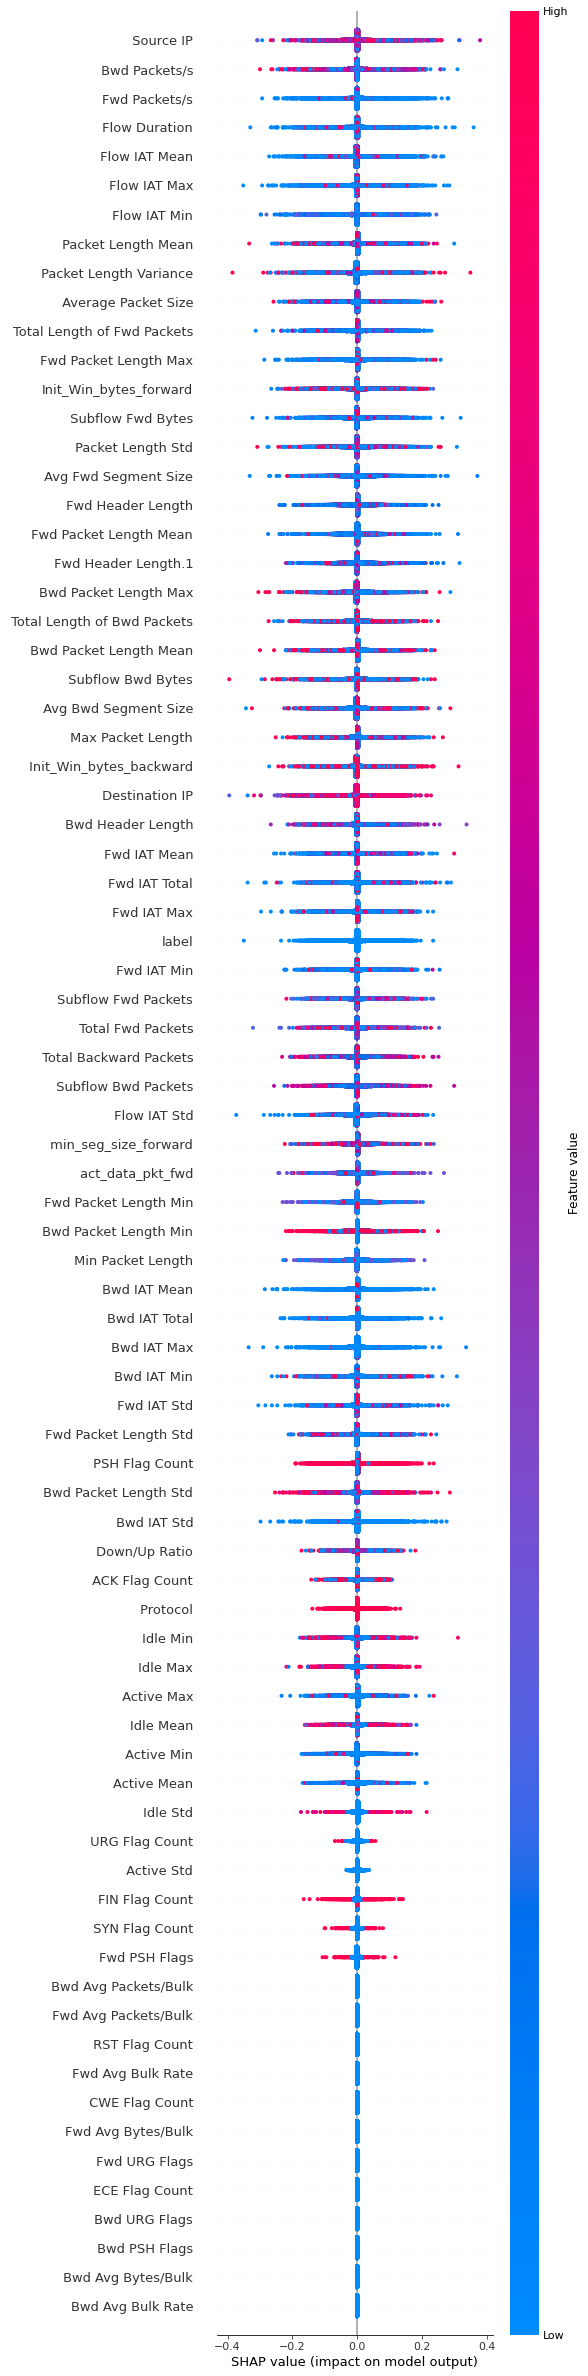

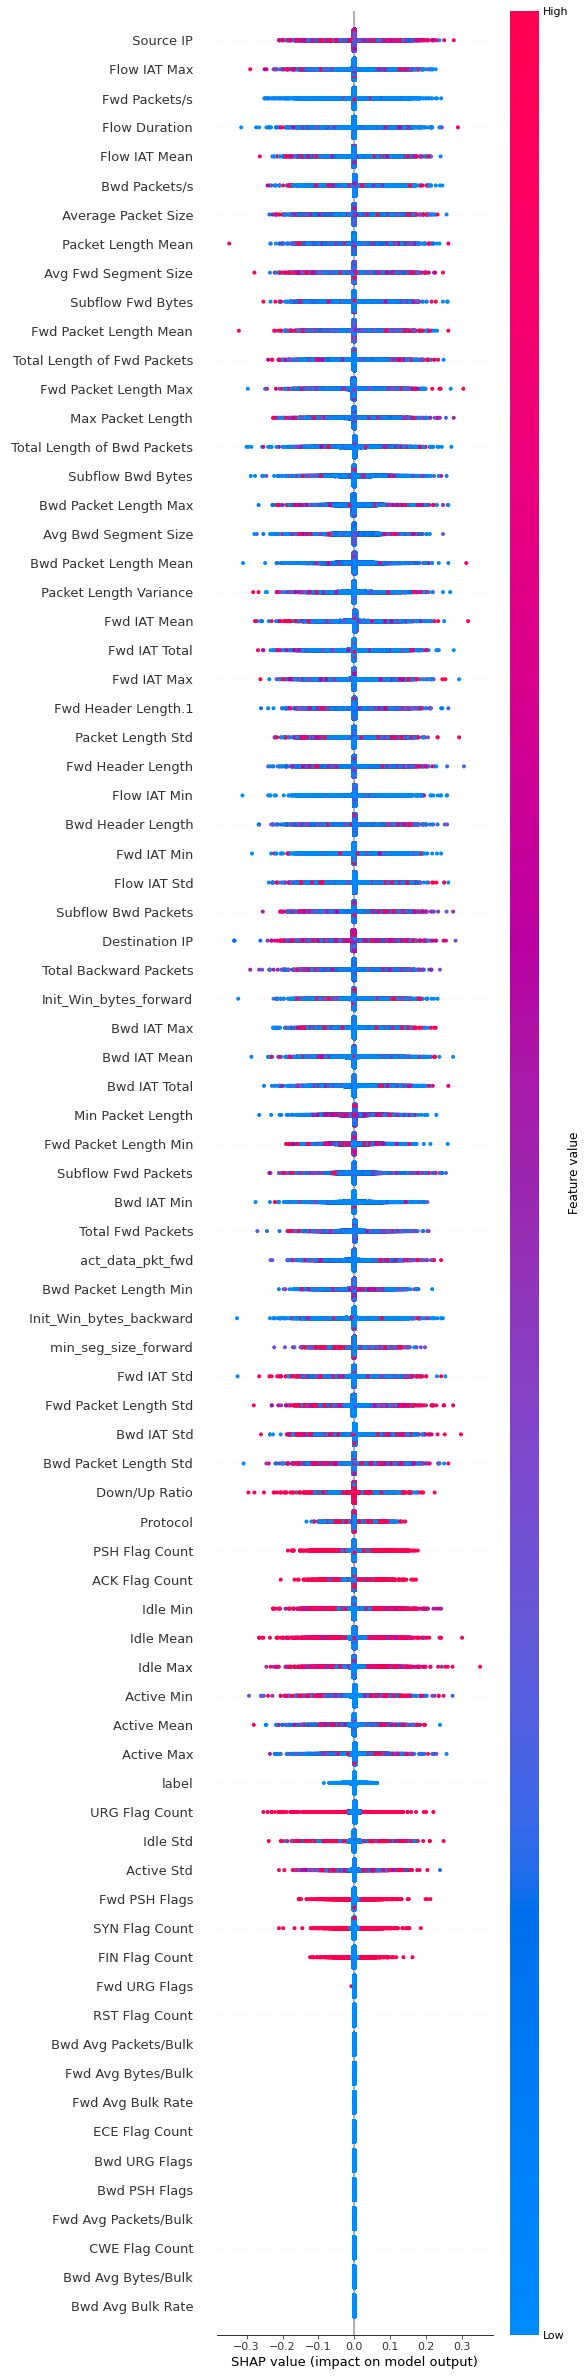

In [2]:
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
import numpy as np


X_test = pd.read_csv('/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/Test_all.csv', encoding="ISO-8859–1", dtype = str)
X_test = X_test.apply(pd.to_numeric)
X_test = X_test.astype(float)

# print(X_test.dtypes.to_string())


# filename_expl = './src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/GNN_SHAP_explainer.sav'
filename = '/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/src/GNN_Model1/XP_CICIDS2017/XAI/SHAP_SAVED/GNN_SHAP_shapvalues_all.sav'


# load_explainer = pickle.load(open(filename_expl, 'rb'))
# print(load_explainer)

label_column = X_test["label"]
attack_indx = []
benign_indx = []
for i, x in enumerate(label_column):
    if (x == 1.0):
        attack_indx.append(i)
    elif (x == 0.0):
        benign_indx.append(i)

load_shap_values = pickle.load(open(filename, 'rb'))

shap.summary_plot(load_shap_values[attack_indx], feature_names = X_test.columns, max_display=X_test.shape[1])
shap.summary_plot(load_shap_values[benign_indx], feature_names = X_test.columns, max_display=X_test.shape[1])

## Scatter Plots
For attacks intances (the rank for benign instances) :
1. Bwd Packets/s ................. (5) -
2. Fwd Packets/s ................. (2)
3. Flow Duration ................. (3)
4. Flow IAT Mean ................. (4)
5. Flow IAT Max .................. (1) +
6. Flow IAT Min .................. (26) -
7. Packet Length Mean ............ (7)
8. Packet Length Variance ........ (19) -
9. Average Packet Size ........... (6) +
10. Total Length of Fwd Packets .. (11) -

For benign intances (the rank for attacks instances) :
1. Flow IAT Max ................. (5) -
2. Fwd Packets/s ................ (2)
3. Flow Duration ................ (3)
4. Flow IAT Mean ................ (4)
5. Bwd Packets/s ................ (1) +
6. Average Packet Size .......... (9) -
7. Packet Length Mean ........... (7)
8. Avg Fwd Segment Size ......... (15) -
9. Subflow Fwd Bytes ............ (13) -
10. Fwd Packet Length Mean ...... (17) -

## Interpretation on "Bwd Packets/s" for both Benign & Intrusion instances

.values =
array([ 0.        , -0.025     , -0.04666667, ...,  0.01833333,
        0.        ,  0.03166667])

.base_values =
array([0.  , 0.19, 0.  , ..., 0.42, 0.  , 0.  ])

.data =
array([6.98110630e-02, 2.32558139e+04, 8.73785610e-02, ...,
       2.27272727e+04, 0.00000000e+00, 1.00000000e+04])


(-10000.0, 2010000.0)

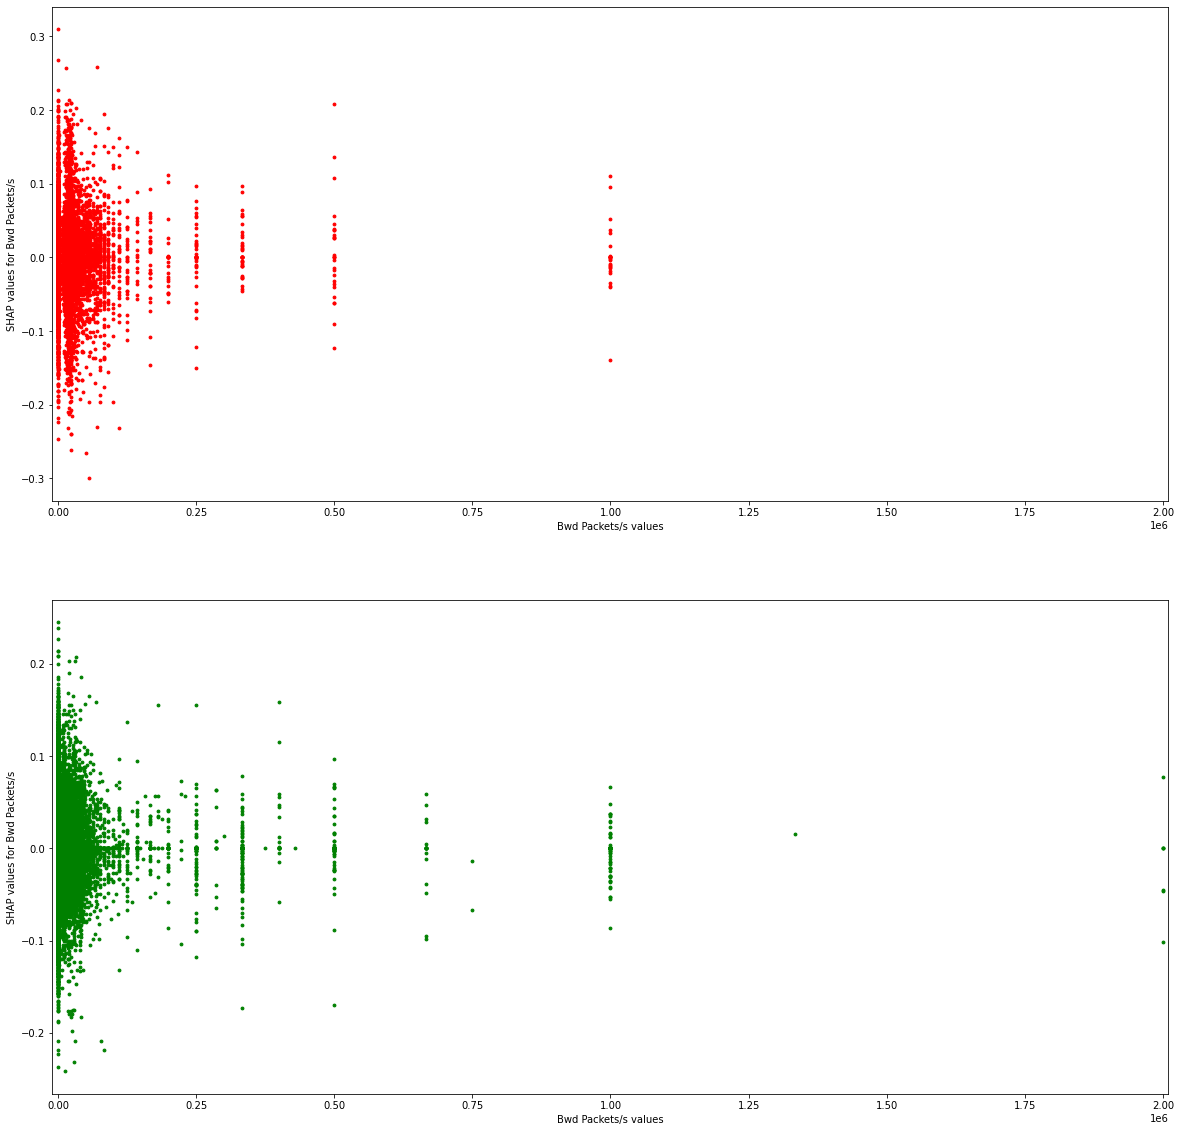

In [3]:
print(load_shap_values[attack_indx," Bwd Packets/s"])

# shap.plots.scatter(load_shap_values[attack_indx," Bwd Packets/s"], color = "r")
# shap.plots.scatter(load_shap_values[benign_indx," Bwd Packets/s"], color = "g")

import matplotlib.pyplot as plt

# data = edge features
# values = shap values

fig, ax = plt.subplots(2, figsize=(20, 20))
ax[0].scatter(load_shap_values[attack_indx," Bwd Packets/s"].data, load_shap_values[attack_indx," Bwd Packets/s"].values, color = "r", marker = "o", s = 8)
ax[0].set_xlabel("Bwd Packets/s values")
ax[0].set_ylabel("SHAP values for Bwd Packets/s")
ax[0].set_xlim([-10000, max(max(load_shap_values[attack_indx," Bwd Packets/s"].data), max(load_shap_values[benign_indx," Bwd Packets/s"].data))+10000])

ax[1].scatter(load_shap_values[benign_indx," Bwd Packets/s"].data, load_shap_values[benign_indx," Bwd Packets/s"].values, color = "g", marker = "o", s = 8)
ax[1].set_xlabel("Bwd Packets/s values")
ax[1].set_ylabel("SHAP values for Bwd Packets/s")
ax[1].set_xlim([-10000, max(max(load_shap_values[attack_indx," Bwd Packets/s"].data), max(load_shap_values[benign_indx," Bwd Packets/s"].data))+10000])

(-1000.0, 20000.0)

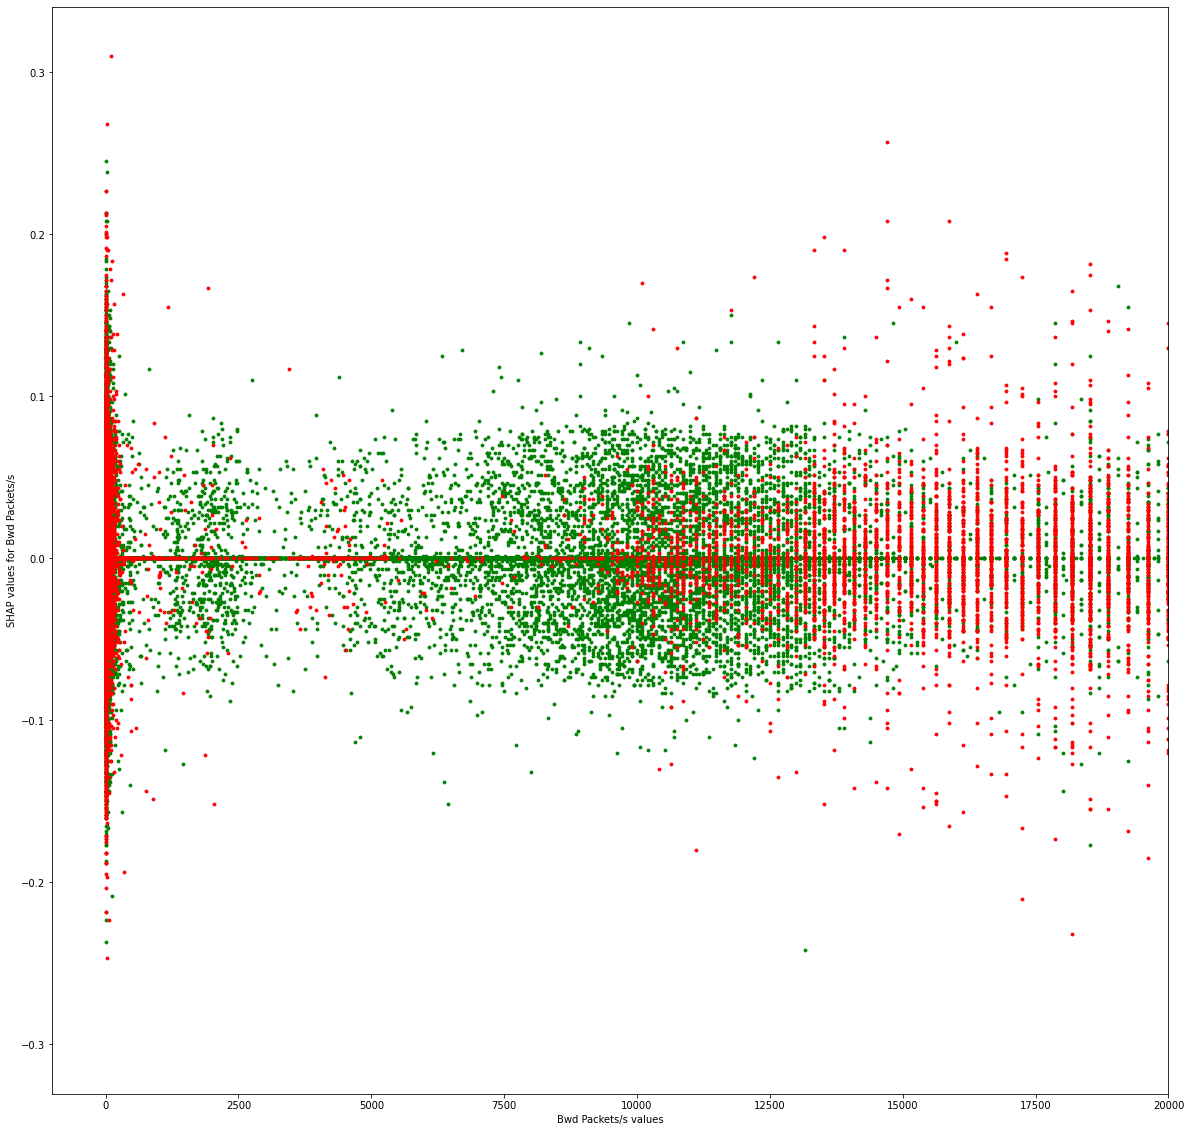

In [4]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Bwd Packets/s"].data, load_shap_values[benign_indx," Bwd Packets/s"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Bwd Packets/s"].data, load_shap_values[attack_indx," Bwd Packets/s"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Bwd Packets/s values")
ax.set_ylabel("SHAP values for Bwd Packets/s")
ax.set_xlim([-1000, max(max(load_shap_values[attack_indx," Bwd Packets/s"].data), max(load_shap_values[benign_indx," Bwd Packets/s"].data))*0.01])

## Interpretation on "Flow IAT Max" for both Benign & Intrusion instances

(-1000000.0, 121000000.0)

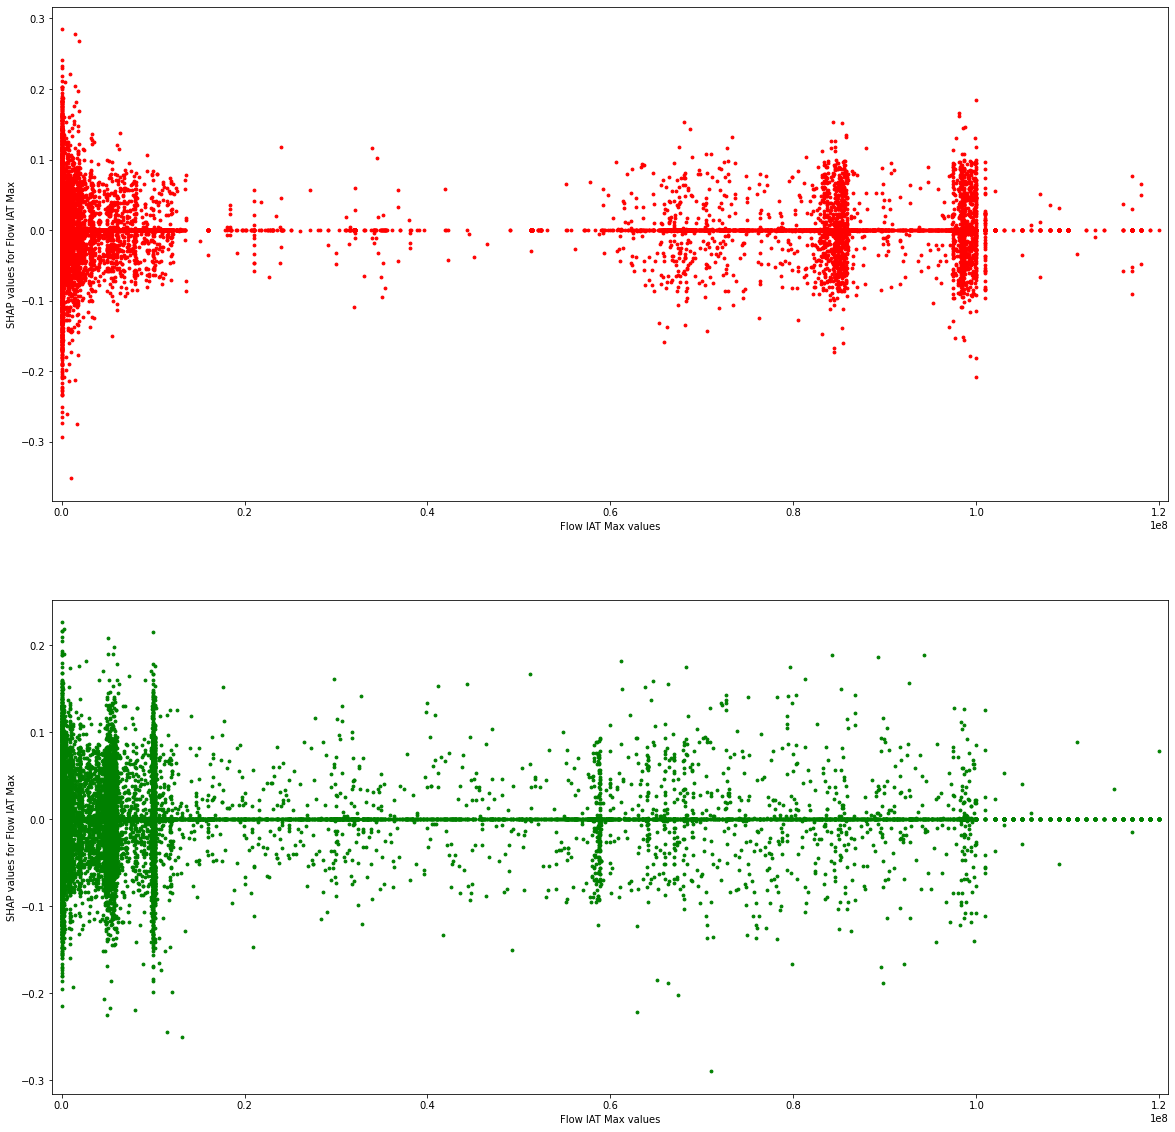

In [5]:
fig, ax = plt.subplots(2, figsize=(20, 20))
ax[0].scatter(load_shap_values[attack_indx," Flow IAT Max"].data, load_shap_values[attack_indx," Flow IAT Max"].values, color = "r", marker = "o", s = 8)
ax[0].set_xlabel("Flow IAT Max values")
ax[0].set_ylabel("SHAP values for Flow IAT Max")
ax[0].set_xlim([-1000000, max(max(load_shap_values[attack_indx," Flow IAT Max"].data), max(load_shap_values[benign_indx," Flow IAT Max"].data))+1000000])

ax[1].scatter(load_shap_values[benign_indx," Flow IAT Max"].data, load_shap_values[benign_indx," Flow IAT Max"].values, color = "g", marker = "o", s = 8)
ax[1].set_xlabel("Flow IAT Max values")
ax[1].set_ylabel("SHAP values for Flow IAT Max")
ax[1].set_xlim([-1000000, max(max(load_shap_values[attack_indx," Flow IAT Max"].data), max(load_shap_values[benign_indx," Flow IAT Max"].data))+1000000])

(80000000.0, 110000000.0)

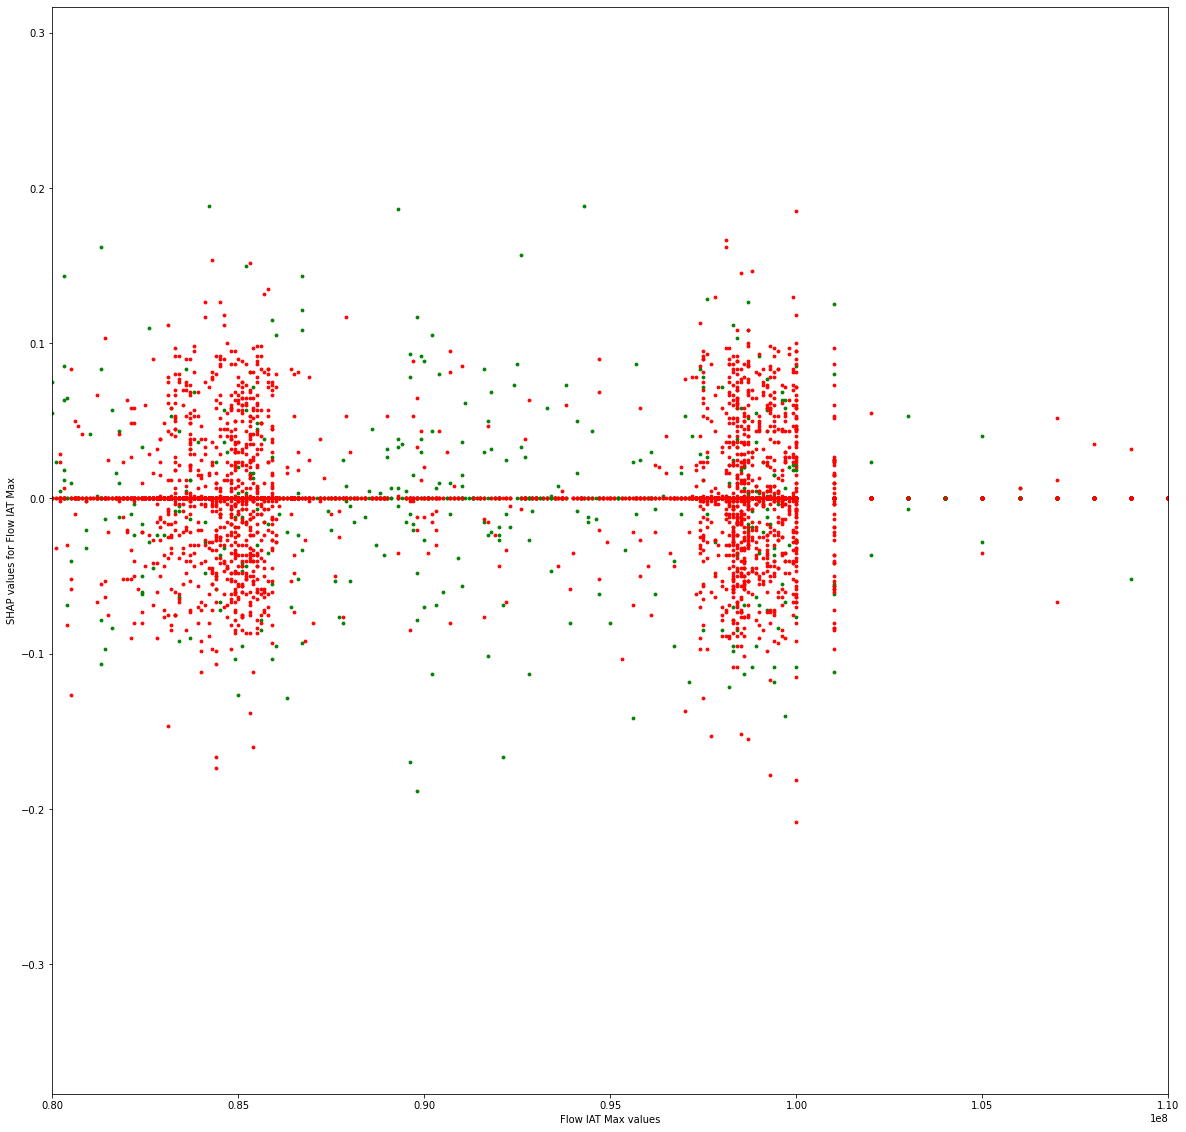

In [6]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Flow IAT Max"].data, load_shap_values[benign_indx," Flow IAT Max"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Flow IAT Max"].data, load_shap_values[attack_indx," Flow IAT Max"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Flow IAT Max values")
ax.set_ylabel("SHAP values for Flow IAT Max")
ax.set_xlim([80000000, 110000000])

(-1000000.0, 15000000.0)

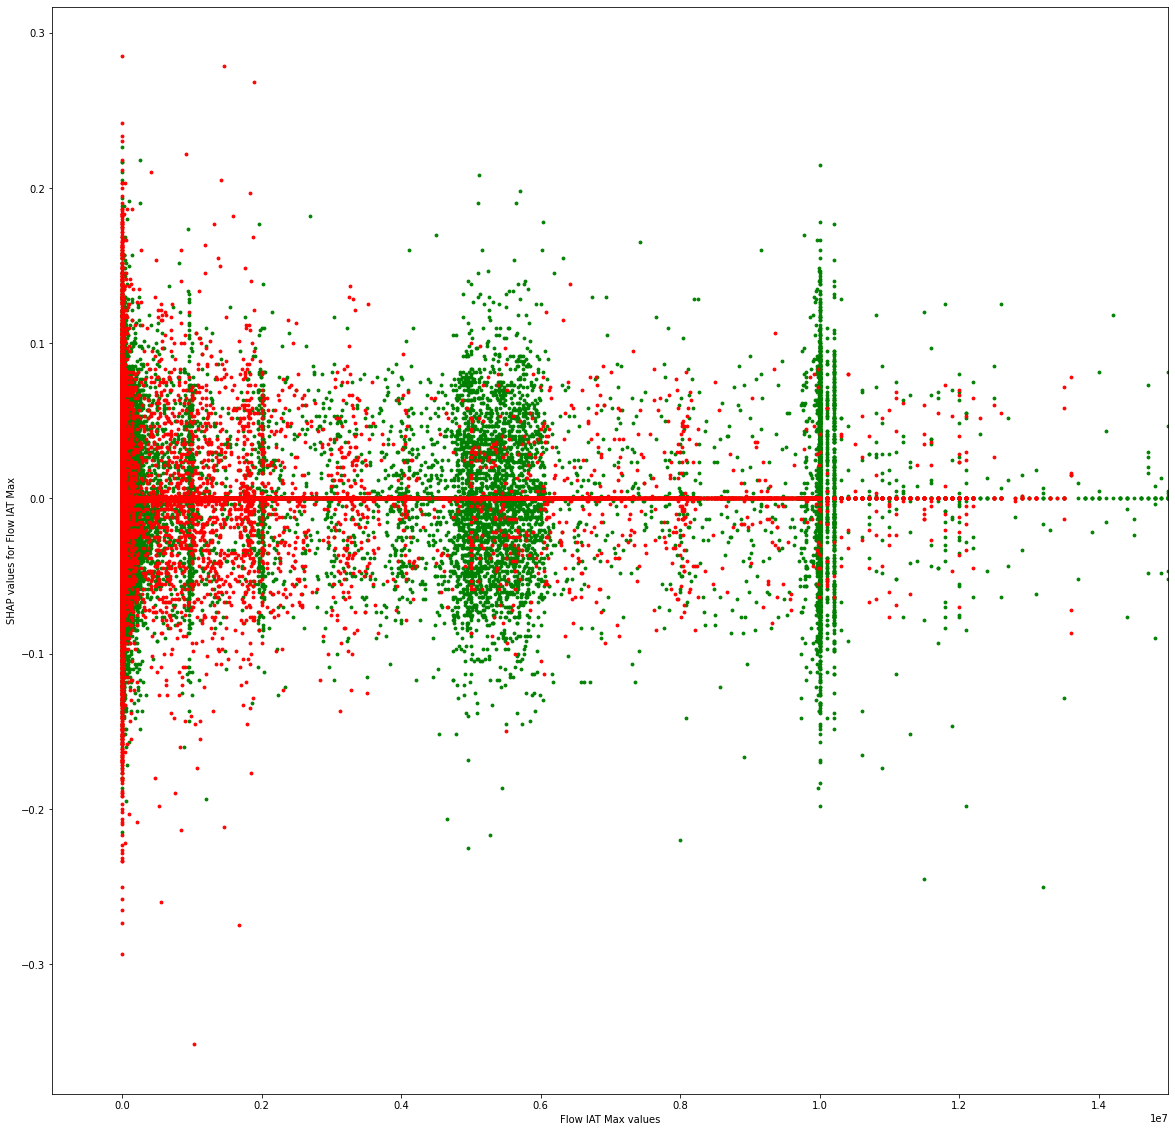

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(load_shap_values[benign_indx," Flow IAT Max"].data, load_shap_values[benign_indx," Flow IAT Max"].values, color = "g", marker = "o", s = 8)
ax.scatter(load_shap_values[attack_indx," Flow IAT Max"].data, load_shap_values[attack_indx," Flow IAT Max"].values, color = "r", marker = "o", s = 8)
ax.set_xlabel("Flow IAT Max values")
ax.set_ylabel("SHAP values for Flow IAT Max")
ax.set_xlim([-1000000, 15000000])

## Pattern Discovery between edge features (using Decision Trees)

In [8]:
# DO NOT DELETE !!!!!

# This is a proof that : The array returned by shap_values is the parallel to the data array we explained the predictions on,
# meaning it is the same shape as the data matrix you apply the model to.
# That means the names of the features for each column are the same as for your data matrix

print(X_test.columns)
print("++++++++++++++++++++++++")
print(load_shap_values[:, 1])
print("++++++++++++++++++++++++")
print(load_shap_values[:, " Subflow Bwd Bytes"])

print()
print("Comparison results : ")
print((load_shap_values[:, 1].values == load_shap_values[:, " Subflow Bwd Bytes"].values).all())
print((load_shap_values[:, 1].data == load_shap_values[:, " Subflow Bwd Bytes"].data).all())
print((load_shap_values[:, 1].base_values == load_shap_values[:, " Subflow Bwd Bytes"].base_values).all())

print()
print()
print("******************")

# And this is a proof that .data of shap represent the edge features in the same order of the X_test
print(load_shap_values.data[1])
print()
print(X_test.loc[1])

Index([' Fwd Packet Length Std', ' Subflow Bwd Bytes',
       ' Total Length of Bwd Packets', 'Idle Mean', ' PSH Flag Count',
       'Init_Win_bytes_forward', 'Total Length of Fwd Packets',
       ' Packet Length Variance', ' Total Backward Packets', ' Bwd Packets/s',
       ' Bwd Packet Length Std', 'Bwd IAT Total', ' Fwd Avg Packets/Bulk',
       ' Bwd Packet Length Min', ' Flow Duration', ' Flow IAT Max',
       ' SYN Flag Count', ' Active Min', ' ACK Flag Count', ' RST Flag Count',
       ' Packet Length Std', ' Bwd IAT Min', ' Subflow Bwd Packets',
       ' Active Std', ' Idle Min', ' Idle Std', ' Fwd URG Flags',
       ' Fwd Packet Length Min', ' Fwd IAT Max', 'Fwd IAT Total',
       ' Total Fwd Packets', 'Subflow Fwd Packets', ' Fwd IAT Mean',
       ' Bwd Header Length', ' Active Max', ' Idle Max', ' URG Flag Count',
       ' Fwd Header Length', ' Bwd IAT Std', 'Fwd Packets/s', ' Bwd PSH Flags',
       ' Protocol', ' Bwd Avg Bytes/Bulk', ' Bwd Packet Length Mean',
       'Bwd A

In [9]:
dt_df = pd.DataFrame(columns = X_test.columns)
print(dt_df.columns)

# Since we want to study pattern recognition between edge features
# We don't insert Source_IP Destination_IP and label shap values 

print(len(load_shap_values.values))
print(load_shap_values.values[0])

for i in range(len(load_shap_values.values)):
    if (i % 10000 == 0):
        print(i)
    dt_df.loc[-1] = load_shap_values.values[i]  # adding a row
    dt_df.index = dt_df.index + 1  # shifting index

print(dt_df)

Index([' Fwd Packet Length Std', ' Subflow Bwd Bytes',
       ' Total Length of Bwd Packets', 'Idle Mean', ' PSH Flag Count',
       'Init_Win_bytes_forward', 'Total Length of Fwd Packets',
       ' Packet Length Variance', ' Total Backward Packets', ' Bwd Packets/s',
       ' Bwd Packet Length Std', 'Bwd IAT Total', ' Fwd Avg Packets/Bulk',
       ' Bwd Packet Length Min', ' Flow Duration', ' Flow IAT Max',
       ' SYN Flag Count', ' Active Min', ' ACK Flag Count', ' RST Flag Count',
       ' Packet Length Std', ' Bwd IAT Min', ' Subflow Bwd Packets',
       ' Active Std', ' Idle Min', ' Idle Std', ' Fwd URG Flags',
       ' Fwd Packet Length Min', ' Fwd IAT Max', 'Fwd IAT Total',
       ' Total Fwd Packets', 'Subflow Fwd Packets', ' Fwd IAT Mean',
       ' Bwd Header Length', ' Active Max', ' Idle Max', ' URG Flag Count',
       ' Fwd Header Length', ' Bwd IAT Std', 'Fwd Packets/s', ' Bwd PSH Flags',
       ' Protocol', ' Bwd Avg Bytes/Bulk', ' Bwd Packet Length Mean',
       'Bwd A

In [10]:
print(dt_df)

         Fwd Packet Length Std   Subflow Bwd Bytes  \
138049                0.000000               0.000   
138048                0.000000               0.000   
138047                0.051667               0.000   
138046                0.000000               0.000   
138045               -0.040000               0.000   
...                        ...                 ...   
4                     0.000000               0.000   
3                     0.000000               0.000   
2                     0.005000              -0.015   
1                     0.000000               0.000   
0                     0.000000               0.000   

         Total Length of Bwd Packets  Idle Mean   PSH Flag Count  \
138049                      0.000000   0.000000         0.000000   
138048                      0.000000   0.000000         0.000000   
138047                      0.000000   0.000000         0.033333   
138046                      0.006667   0.000000         0.000000   
138045     

In [11]:
dt_df_saved = dt_df

In [12]:
dt_df = dt_df.drop(' Source IP', axis=1)
dt_df = dt_df.drop(' Destination IP', axis=1)
dt_df = dt_df.drop('label', axis=1)
print(len(dt_df.columns))

76


In [13]:
dt_df.insert(loc = 0, column = 'label', value = X_test["label"])
print(len(dt_df.columns))
print(dt_df['label'])

77
138049    0.0
138048    0.0
138047    0.0
138046    0.0
138045    0.0
         ... 
4         0.0
3         0.0
2         0.0
1         0.0
0         1.0
Name: label, Length: 138050, dtype: float64


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cols = list(set(list(dt_df.columns )) - set(list(['label'])) )

x_dt_df = dt_df[cols]
y_dt_df = dt_df['label']

# X_train, X_test, y_train, y_test = train_test_split(x_dt_df, y_dt_df, test_size=0.3, random_state=123, stratify= y_dt_df)

dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 8, min_samples_leaf = 5)
# Performing training
dt_entropy.fit(x_dt_df, y_dt_df)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       random_state=100)

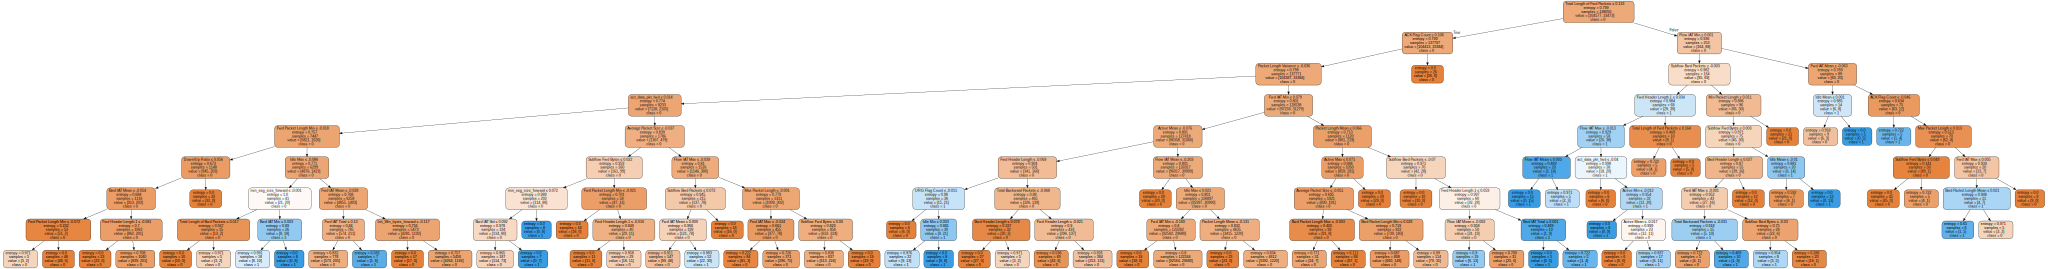

In [37]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dt_entropy, out_file = None, feature_names = cols, class_names = ["0", "1"], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data, format="png")
graph.render("/home/ahmed/GNN-Based-ANIDS/GNN-Based-ANIDS/jupyter_notebooks/XAI/SHAP/DT/dt_entropy_depth8")
graph

In [28]:
print("nb attacks (1) :", len(attack_indx))
print("nb benign (0) :", len(benign_indx))

nb attacks (1) : 33473
nb benign (0) : 104577
